# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def rolling_dice():
    df_times = pd.DataFrame(list(np.random.randint(7, size=10)), columns=["values"])
    return df_times

In [4]:
results_dice = rolling_dice()
results_dice

,values
0,6
1,2
2,4
3,4
4,1
5,0
6,2
7,1
8,6
9,2


#### 2.- Plot the results sorted by value.

In [5]:
# your code here
results_dice = results_dice.sort_values(by="values")
results_dice.plot(kind="bar")

In [6]:
frequency_results_dice = results_dice["values"].value_counts()
frequency_results_dice

2    3
6    2
4    2
1    2
0    1
Name: values, dtype: int64

In [7]:
#here I only write how to count the times of rolling dices, for me.
times_rolled = int(results_dice.count())
times_rolled

10

In [8]:
#another way to calculate the times of rolling dices, just nevermind it.
len(results_dice)

10

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [9]:
# your code here
frequency_results_dice = results_dice["values"].value_counts()
frequency_results_dice

2    3
6    2
4    2
1    2
0    1
Name: values, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff959c69a20>]],
      dtype=object)

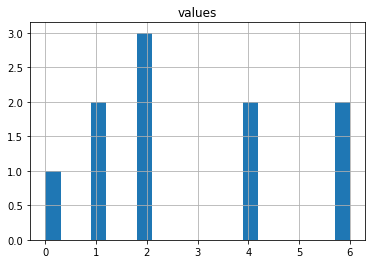

In [10]:
results_dice.hist(bins=20)

In [11]:
"""
while the first plot appears the results in every round, in the second one the results are ordered in an ascending
form through how many times are the results appeared. In the first plot the values are on the Y axis and in the
second plot are on the value X axis
"""

'\nwhile the first plot appears the results in every round, in the second one the results are ordered in an ascending\nform through how many times are the results appeared. In the first plot the values are on the Y axis and in the\nsecond plot are on the value X axis\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# your code here
def mean_func(results_func):
    average = results_func.sum()/int(results_func.count())
    return average

In [13]:
#to save the results
mean_func(results_dice)

values    2.8
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [14]:
# your code here
frequency_results_dice_2 = results_dice["values"].value_counts()
frequency_results_dice_2

2    3
6    2
4    2
1    2
0    1
Name: values, dtype: int64

In [15]:
mean_func(frequency_results_dice_2)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [16]:
# only to compare the results
results_dice.median()

values    2.0
dtype: float64

In [29]:
def median_func(results_func_2):
    sorted_list = sorted(list(results_func_2))
    lst_len = len(results_func_2)
    index = (lst_len - 1) // 2
    if (lst_len % 2 != 0):
        return (sorted_list[index])
    else:
        return ((sorted_list[index] + sorted_list[index + 1])/2.0)

In [31]:
median_func(results_dice["values"])

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [19]:
results_dice

,values
5,0
4,1
7,1
1,2
6,2
9,2
2,4
3,4
0,6
8,6


In [20]:
# your code here, we are talking about THREE quartiles right?
def quartile_func(results_func_2):
    sorted_list = sorted(list(results_func_2["values"]))
    Q1_list = []
    Q3_list = []
    lst_len = len(sorted_list)
    if(lst_len % 2 == 0):
        for i in range(lst_len//2):
            Q1_list.append(sorted_list[i])
            Q3_list.append(sorted_list[i+(lst_len//2)])
        return Q1_list,Q3_list
    else:
        provi_list = sorted_list
        provi_list.pop(provi_list[(lst_len//2)-1])
        for i in range(len(provisional_list)//2):
            Q1_list.append(sorted_list[i])
            Q3_list.append(sorted_list[i+(lst_len//2)])
        return Q1_list,Q3_list

In [21]:
Q1_list,Q3_list = quartile_func(results_dice)
print(Q1_list)
print(Q3_list)

[0, 1, 1, 2, 2]
[2, 4, 4, 6, 6]


In [22]:
Q1_list_df = pd.DataFrame(Q1_list, columns=["values"])
Q3_list_df = pd.DataFrame(Q3_list, columns=["values"])

In [23]:
Q1 = median_func(Q1_list_df)
Q2 = median_func(results_dice)
Q3 = median_func(Q3_list_df)
print(Q1,Q2,Q3)
results_dice

1 2.0 4


,values
5,0
4,1
7,1
1,2
6,2
9,2
2,4
3,4
0,6
8,6


In [50]:
results_dice.describe()

,values
count,10.000000
mean,3.200000
std,1.988858
min,0.000000
25%,2.250000
50%,4.000000
75%,4.000000
max,6.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [25]:
# your code here
hundred_df = pd.read_csv("/home/pau/Ironhack/week4/lab_20190716_understanding_descriptive_statistics/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv")
hundred_df = hundred_df.drop(["Unnamed: 0"], axis=1)
hundred_df.sort_values(by="value")

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
63,63,1
26,26,1
89,89,1
3,3,1
94,94,1


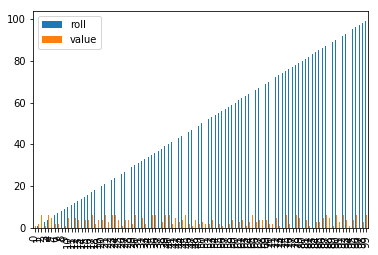

In [26]:
hundred_df.plot(kind="bar")

In [27]:
"""
a perfect diagonal line represented by the rolls from 0 to 100
"""

'\na perfect diagonal line represented by the rolls from 0 to 100\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [32]:
# your code here
mean_func(hundred_df["value"])

3.74

##### 3.- Now, calculate the frequency distribution.


In [36]:
# your code here
frequency_results_dice_hundred = hundred_df["value"].value_counts()
frequency_results_dice_hundred

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

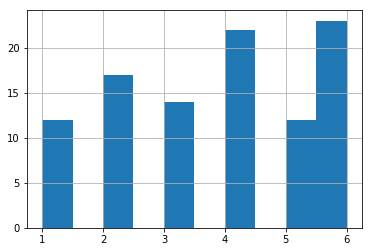

In [37]:
# your code here
hundred_df["value"].hist()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [40]:
# your code here
thousand_df = pd.read_csv("/home/pau/Ironhack/week4/lab_20190716_understanding_descriptive_statistics/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv")
thousand_df = thousand_df.drop(["Unnamed: 0"], axis=1)
thousand_df.sort_values(by="value")

,roll,value
564,564,1
922,922,1
560,560,1
213,213,1
214,214,1
221,221,1
222,222,1
551,551,1
549,549,1
911,911,1


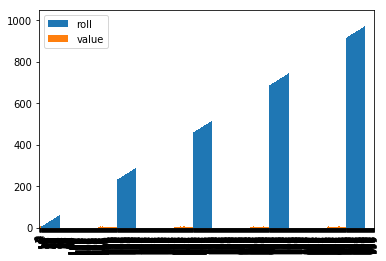

In [41]:
thousand_df.plot(kind="bar")

In [ ]:
"""
no changes appears
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""